In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from pathlib import Path

In [2]:
# Read in the data
df = pd.read_csv('../Data/data_clean.csv',
                 parse_dates=['Date', 'Date of Birth'],
                 delimiter=';',
                 )

In [3]:
# Define distances for each event in kilometers
distance_km = {
    '100 m': 0.1,
    '200 m': 0.2,
    '400 m': 0.4,
    '800 m': 0.8,
    '1500 m': 1.5,
    '5000 m': 5,
    '10,000 m': 10,
    'Half marathon': 21.0975,
    'Marathon': 42.195
}

# Calculate pace in minutes per kilometer
df['Pace_min_km'] = (df['Time_s'] / 60) / df['Event'].map(distance_km)

# Split df by gender
grouped = df.groupby('Gender')

# Extracting each group into a separate DataFrame
men_df = grouped.get_group('Men')
woman_df = grouped.get_group('Women')

sorted_events_by_distance = sorted(distance_km.keys(), key=lambda x: distance_km[x])

In [4]:
df


,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Time_s,Age,Pace_min_km
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,100.91,23.742466,2.102292
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,101.01,21.712329,2.104375
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,101.09,21.693151,2.106042
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,101.11,26.717808,2.106458
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,101.24,26.687671,2.109167
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18236,1000,00:03:33.250000,Noureddine Morceli,ALG,1970-02-28,1.0,Moskva,1995-06-05,Men,1500 m,213.25,25.282192,2.369444
18237,1000,00:03:33.250000,Paul Korir,KEN,1977-07-15,5.0,Zürich,2003-08-15,Men,1500 m,213.25,26.101370,2.369444
18238,1000,00:03:33.250000,Hudson Santos de Souza,BRA,1977-02-25,5.0,Rieti,2005-08-28,Men,1500 m,213.25,28.523288,2.369444
18239,1000,00:03:33.250000,Issac Songok,KEN,1984-04-25,2.0,Stockholm,2006-07-25,Men,1500 m,213.25,22.263014,2.369444


In [5]:
df["Gender"].head()

0    Men
1    Men
2    Men
3    Men
4    Men
Name: Gender, dtype: object

In [6]:
# -------- Fontproperties ------------------

title_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Oswald/static/Oswald-Regular.ttf"),
    size=18,
    weight="normal",
)

subtitle_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Roboto/Roboto-Medium.ttf"),
    size=12,
    weight="normal",
)

annotations_font = mpl.font_manager.FontProperties(
    fname=Path("../Fonts/Roboto/Roboto-Light.ttf"),
    size=12,
    weight="normal",
)

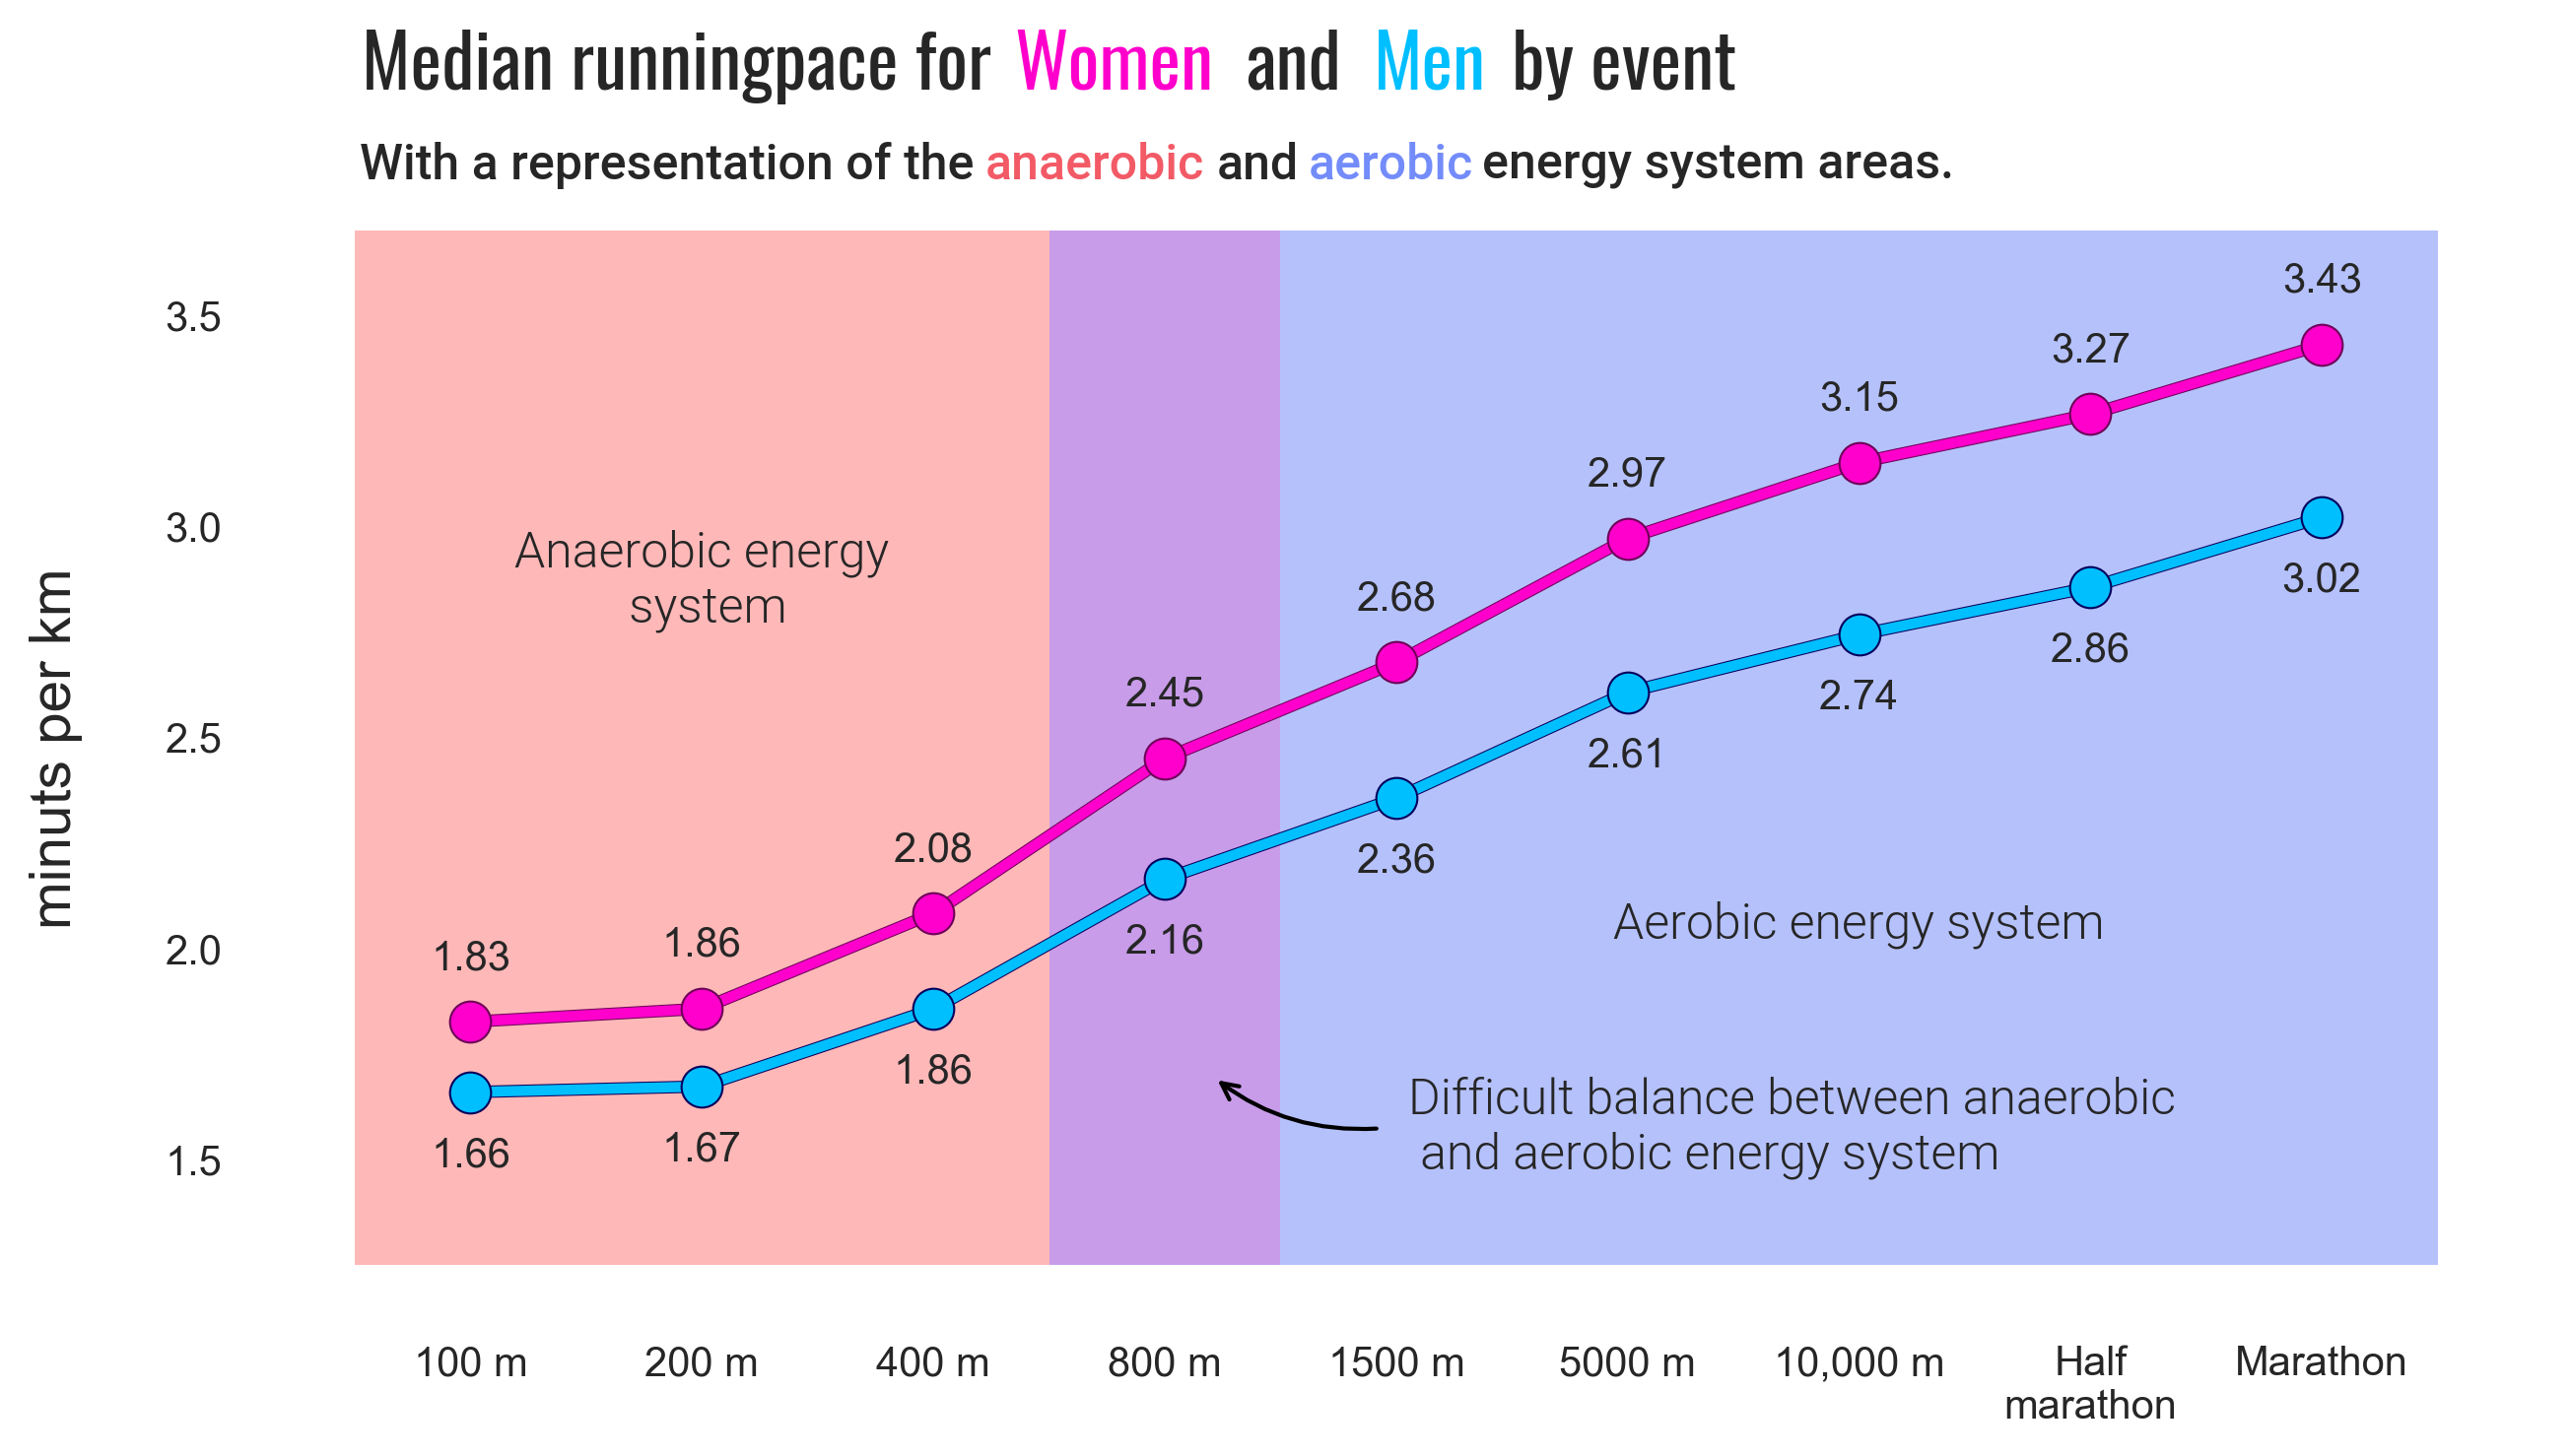

In [8]:
f, ax = plt.subplots(figsize=(10, 5), dpi=300)

common_xticks = ['100 m', '200 m', '400 m', '800 m', '1500 m', '5000 m', '10,000 m', 'Half\nmarathon', 'Marathon']

# Title
title_start = "Median runningpace for"
title_colored_women = "Women"
title_middle = "and"
title_colored_men = "Men"
title_end = "by event"

# Set each part of the title with different colors
txt_pos_start = 2.25
txt_pos_women = txt_pos_start + 0.1
txt_pos_middle = txt_pos_women + 1
txt_pos_men = txt_pos_middle + 0.55
txt_pos_end = txt_pos_men + 0.6
txt_pos_vert = 4
ax.text(txt_pos_start, txt_pos_vert, title_start, ha='right', va='bottom', fontproperties=title_font)
ax.text(txt_pos_women, txt_pos_vert, title_colored_women, ha='left', va='bottom', color='#ff00cc', fontproperties=title_font)
ax.text(txt_pos_middle, txt_pos_vert, title_middle, ha='left', va='bottom', fontproperties=title_font)
ax.text(txt_pos_men, txt_pos_vert, title_colored_men, ha='left', va='bottom', color='#00bfff', fontproperties=title_font)
ax.text(txt_pos_end, txt_pos_vert, title_end, ha='left', va='bottom', fontproperties=title_font)

# Subtitle
subtitle_start = "With a representation of the"
subtitle_colored_anaerobic = "anaerobic"
subtitle_middle = "and"
subtitle_colored_aerobic = "aerobic"
subtitle_end = "energy system areas."

# Set each part of the title with different colors
txt2_pos_start = -0.4775
txt2_pos_anaerobic = txt2_pos_start + 2.7
txt2_pos_middle = txt2_pos_anaerobic + 1
txt2_pos_aerobic = txt2_pos_middle + 0.4
txt2_pos_end = txt2_pos_aerobic + 0.75
txt2_pos_vert = 3.8
ax.text(txt2_pos_start, txt2_pos_vert, subtitle_start, ha='left', va='bottom', fontproperties=subtitle_font)
ax.text(txt2_pos_anaerobic, txt2_pos_vert, subtitle_colored_anaerobic, ha='left', va='bottom', color='#f25a66', fontproperties=subtitle_font)
ax.text(txt2_pos_middle, txt2_pos_vert, subtitle_middle, ha='left', va='bottom', fontproperties=subtitle_font)
ax.text(txt2_pos_aerobic, txt2_pos_vert, subtitle_colored_aerobic, ha='left', va='bottom', color='#738cfa', fontproperties=subtitle_font)
ax.text(txt2_pos_end, txt2_pos_vert, subtitle_end, ha='left', va='bottom', fontproperties=subtitle_font)

# --------------------------------------------Men-------------------------------------------

# Calculate the median pace for each event to plot the trend line
median_pace_by_event = men_df.groupby('Event')['Pace_min_km'].median().reset_index()

# Sort the median pace data by event length
median_pace_by_event['Event'] = pd.Categorical(median_pace_by_event['Event'], categories=sorted_events_by_distance, ordered=True)
median_pace_by_event = median_pace_by_event.sort_values('Event')

# Calculate new x-coordinates for the line- and scatterplot
new_x_coords = [i for i in range(len(sorted_events_by_distance))]

# Add the scatterplot
sns.scatterplot(data=median_pace_by_event, x=new_x_coords, y=median_pace_by_event['Pace_min_km'], s=100, color='#00bfff', edgecolors='#05005c', zorder=99, linewidth=0.5)

# Add the trend line for the median pace of each event
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#00bfff', linewidth=2.5, zorder=51)
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color= '#05005c', linewidth=3, zorder=50)

# Calculate the x and y values for the median pace annotations
pace_list = []
rounded_value = []
for i in median_pace_by_event['Pace_min_km']:
    pace_list.append(i)
    rounded_value.append(round(i, 2))
    
for i in range(len(pace_list)):
    median_anno = ax.text(x=new_x_coords[i], y=pace_list[i] - 0.15, s=rounded_value[i], ha='center', va='center')
    
# Shift the line to the middle of the boxes
for line in ax.lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()

# --------------------------- Women --------------------------------------
# Calculate the median pace for each event to plot the trend line
median_pace_by_event = woman_df.groupby('Event')['Pace_min_km'].median().reset_index()

# Sort the median pace data by event length
median_pace_by_event['Event'] = pd.Categorical(median_pace_by_event['Event'], categories=sorted_events_by_distance, ordered=True)
median_pace_by_event = median_pace_by_event.sort_values('Event')

# Calculate new x-coordinates for the line- and scatterplot
new_x_coords = [i for i in range(len(sorted_events_by_distance))]

# Add the scatterplot
sns.scatterplot(data=median_pace_by_event, x=new_x_coords, y=median_pace_by_event['Pace_min_km'], s=100, color='#ff00cc', edgecolors='#6e0058', zorder=99,  linewidth=0.5)

# Add the trend line for the median pace of each event
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color='#6e0058', linewidth=3, zorder=50)
sns.lineplot(x=new_x_coords, y='Pace_min_km', data=median_pace_by_event, marker="", ax=ax, color='#ff00cc', linewidth=2.5, zorder=51)

# Set and modify the bottom (x-axis) ticks and tick-labels
ax.set_xticks(range(0, 9, 1), labels=common_xticks)

# Calculate the x and y values for the median pace annotations
pace_list = []
rounded_value = []
for i in median_pace_by_event['Pace_min_km']:
    pace_list.append(i)
    rounded_value.append(round(i, 2))
    
for i in range(len(pace_list)):
    median_anno = ax.text(x=new_x_coords[i], y=pace_list[i] + 0.15, s=rounded_value[i], ha='center', va='center')

# -------------------- Plot modifications --------------------------------

# Add a invisible scatter for extending the plot
ax.scatter(x=1, y=1.25, color='orange', marker='+', s=100, alpha=0)
# ax.scatter(x=1, y=4, color='orange', marker='+', s=100, alpha=0)

# Modifies gridlines
ax.xaxis.grid(True, linestyle='-', linewidth=50, color='lightgrey', alpha=0.0, zorder=1)  # Enable x-axis grid lines

# Disable y-axis grid
ax.yaxis.grid(False)

# Set the y-axis label
ax.set_ylabel('minuts per km', labelpad=20, fontsize=14)

# Define the rectangles
rec_height = 2.45
ar1 = Rectangle(xy=(-0.5,1.25), width=3, height=rec_height, # data coordinates by default
               facecolor="#ff4f4f", zorder=0,
               linewidth=0, alpha=0.4)
ar2 = Rectangle(xy=(2.5,1.25), width=1, height=rec_height, # data coordinates by default
               facecolor="#7608c9", zorder=0,
               linewidth=0, alpha=0.4)
ar3 = Rectangle(xy=(3.5,1.25), width=5, height=rec_height, # data coordinates by default
               facecolor="#4865f7", zorder=0,
               linewidth=0, alpha=0.4)

# Add the rectangles to our chart object
ax.add_patch(ar1)
ax.add_patch(ar2)
ax.add_patch(ar3)

# Add annotation1 "anaerobic"
pointx = 1
pointy = 2.75

text1 = ax.text(pointx, pointy, "Anaerobic energy\n system".format(pointx, pointy),
                ha='center', 
                va='bottom', 
                fontproperties=annotations_font)

# Add annotation2 "aerobic"
pointx = 6
pointy = 2

text1 = ax.text(pointx, pointy, "Aerobic energy system".format(pointx, pointy),
                ha='center', 
                va='bottom', 
                fontproperties=annotations_font)

# Add annotation3 with arrow "anaerobic and aerobic"
pointx = 3.2
pointy = 1.7

annox = pointx + 0.75
annoy = pointy - 0.125

anno1 = ax.annotate(xy=(pointx, pointy), text="",
                   xytext=(annox,annoy),
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2", ec='black'),
                   zorder=99)

annotext = ax.text(x=annox + 0.1, y=annoy,
                   s="Difficult balance between anaerobic \n"
                     " and aerobic energy system",
                   va="center",
                   fontproperties=annotations_font)

# Adjust the bottom margin
f.subplots_adjust()
    
sns.despine(left=True, top=True, right=True, bottom=True)

plt.show()